In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')
zip_path = "/content/drive/MyDrive/DL_Dataset/old_dataset.zip"
extract_path = "/content/dataset"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/dataset/tomato/train"
val_dir = "/content/dataset/tomato/val"



In [ ]:
# Data Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No Augmentation for Test Data (Only Rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # Ensures randomized batches

Found 10000 images belonging to 10 classes.


In [ ]:
# Load Validation/Test Data
test_generator = test_datagen.flow_from_directory(
    val_dir,  # If using test data, change this to test_dir
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)  # No shuffling for evaluation

Found 1000 images belonging to 10 classes.


In [ ]:
# First model
from keras.layers import BatchNormalization
from keras.layers import Dropout
cnn = tf.keras.models.Sequential()
#Convolution layer 1
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(BatchNormalization())
# Pooling 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())
#Convolution layer 2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn.add(Dropout(0.25))
# cnn.add(BatchNormalization())
# Pooling 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn.add(BatchNormalization())
# Flattening
cnn.add(tf.keras.layers.Flatten())
# cnn.add(BatchNormalization())
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn.add(BatchNormalization())
#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))
#Compiling
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
cnn.summary()
# Fit
temp = cnn.fit(x = train_generator, validation_data=test_generator,epochs=25)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,319,978 (20.29 MB)

 Trainable params: 5,319,978 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 184ms/step - accuracy: 0.3263 - loss: 1.9752 - val_accuracy: 0.5350 - val_loss: 1.5249
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.7518 - loss: 0.7283 - val_accuracy: 0.7610 - val_loss: 0.7116
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 58s 186ms/step - accuracy: 0.8151 - loss: 0.5294 - val_accuracy: 0.6760 - val_loss: 1.1037
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 179ms/step - accuracy: 0.8486 - loss: 0.4402 - val_accuracy: 0.8270 - val_loss: 0.5566
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 0.8727 - loss: 0.3654 - val_accuracy: 0.8080 - val_loss: 0.6120
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 181ms/step - accuracy: 0.8979 - loss: 0.3004 - val_accuracy: 0.8130 - val_loss: 0.6091
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 56s 180ms/step - accuracy: 0.9001 - loss: 0.2819 - val_accuracy: 0.7680 - val_loss: 0.8270
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 183ms/step - accuracy: 0.9168 - loss: 0

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn.evaluate(train_generator)
scores2=cnn.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - accuracy: 0.9799 - loss: 0.0581
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8452 - loss: 0.6540
Training Loss is :0.05708693340420723
Training Accuracy is :98.089998960495 %
Validation Loss is :0.6278849840164185
Validation Accuracy is :85.79999804496765 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-23-8aff7a8dcf24>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.89      0.91       100
                        Tomato___Early_blight       0.72      0.85      0.78       100
                         Tomato___Late_blight       0.89      0.85      0.87       100
                           Tomato___Leaf_Mold       0.94      0.77      0.85       100
                  Tomato___Septoria_leaf_spot       0.80      0.82      0.81       100
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.70      0.80       100
                         Tomato___Target_Spot       0.82      0.79      0.81       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.90      0.94      0.92       100
                 Tomato___Tomato_mosaic_virus       0.86      0.98      0.92       100
                             Tomato___healthy       0.85      0.99      0.91       100

                                     accu

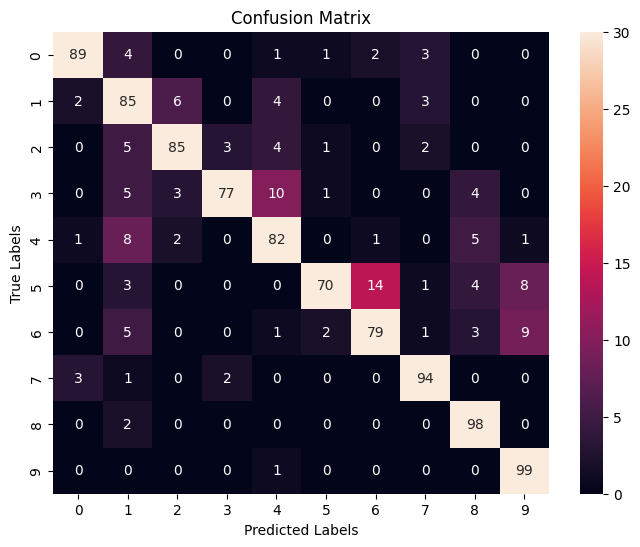

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix with color scale limited to 30
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".5g", vmax=30)  # Limits the color scale to 30

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


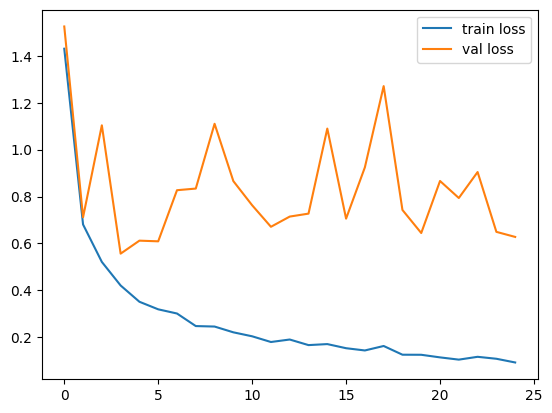

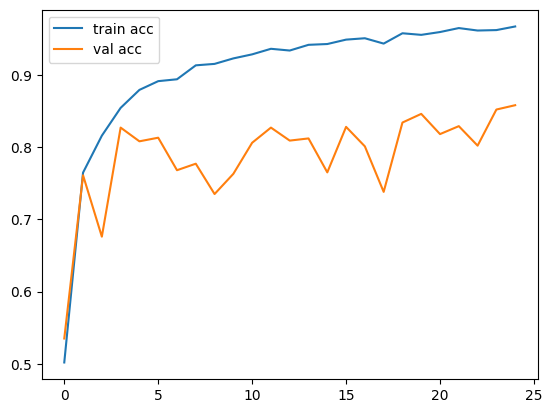

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Second model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn2 = tf.keras.models.Sequential()

#Convolution layer 1
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn2.add(BatchNormalization())

# Pooling 1
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn2.add(BatchNormalization())

#Convolution layer 2
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn2.add(BatchNormalization())

# Pooling 2
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#cnn2.add(Dropout(0.25))
# cnn2.add(BatchNormalization())

# Flattening
cnn2.add(tf.keras.layers.Flatten())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn2.add(BatchNormalization())

#Full Conncetion
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
# cnn2.add(BatchNormalization())

#Output Layer
cnn2.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn2.summary()

# Fit
temp = cnn2.fit(x = train_generator, validation_data=test_generator,epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,337,002 (20.36 MB)

 Trainable params: 5,336,746 (20.36 MB)

 Non-trainable params: 256 (1.00 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 76s 223ms/step - accuracy: 0.6032 - loss: 1.1829 - val_accuracy: 0.5420 - val_loss: 1.6546
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 204ms/step - accuracy: 0.8334 - loss: 0.4866 - val_accuracy: 0.6380 - val_loss: 1.0946
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 252ms/step - accuracy: 0.8812 - loss: 0.3522 - val_accuracy: 0.5630 - val_loss: 1.6499
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.8926 - loss: 0.3047 - val_accuracy: 0.6750 - val_loss: 1.0773
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 211ms/step - accuracy: 0.9050 - loss: 0.2814 - val_accuracy: 0.8200 - val_loss: 0.6322
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 219ms/step - accuracy: 0.9188 - loss: 0.2324 - val_accuracy: 0.7770 - val_loss: 0.6980
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 213ms/step - accuracy: 0.9238 - loss: 0.2117 - val_accuracy: 0.8750 - val_loss: 0.3905
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - accuracy: 0.9352 - loss: 0

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn2.evaluate(train_generator)
scores2=cnn2.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 193ms/step - accuracy: 0.5177 - loss: 2.8029
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3914 - loss: 4.0668
Training Loss is :2.7875404357910156
Training Accuracy is :52.52000093460083 %
Validation Loss is :3.5690088272094727
Validation Accuracy is :51.099997758865356 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn2.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-9-4696c20952d3>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.96      0.24      0.38       100
                        Tomato___Early_blight       0.67      0.36      0.47       100
                         Tomato___Late_blight       0.66      0.51      0.58       100
                           Tomato___Leaf_Mold       0.78      0.21      0.33       100
                  Tomato___Septoria_leaf_spot       0.33      0.92      0.48       100
Tomato___Spider_mites Two-spotted_spider_mite       0.23      0.09      0.13       100
                         Tomato___Target_Spot       0.42      0.91      0.58       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.83      0.15      0.25       100
                 Tomato___Tomato_mosaic_virus       0.52      0.98      0.68       100
                             Tomato___healthy       1.00      0.74      0.85       100

                                     accu

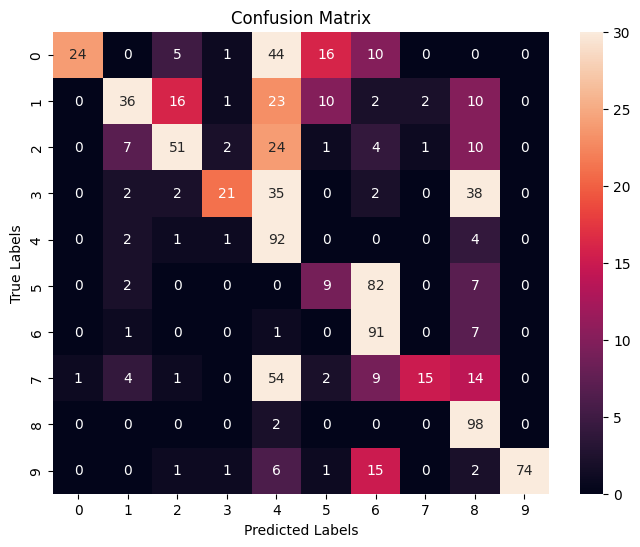

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix with color scale limited to 30
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".5g", vmax=30)  # Limits the color scale to 30

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

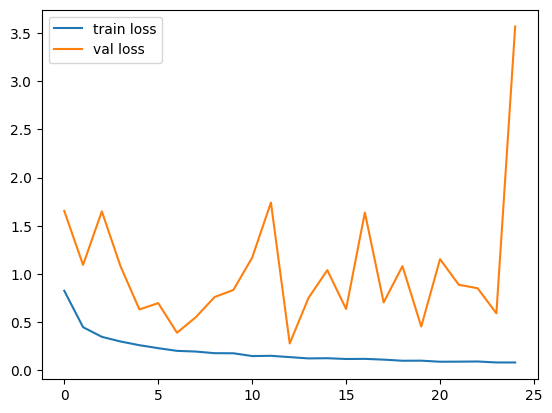

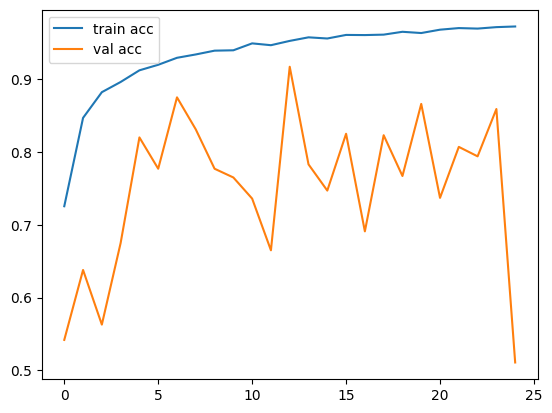

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Third model

from keras.layers import BatchNormalization
from keras.layers import Dropout

cnn3 = tf.keras.models.Sequential()

#Convolution layer 1
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn3.add(BatchNormalization())

# Pooling 1
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn3.add(BatchNormalization())

#Convolution layer 2
cnn3.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3, activation='relu',input_shape=[150, 150,3]))
# cnn3.add(BatchNormalization())

# Pooling 2
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# cnn3.add(BatchNormalization())

# Flattening
cnn3.add(tf.keras.layers.Flatten())
# cnn3.add(BatchNormalization())

#Full Conncetion
cnn3.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn3.add(Dropout(0.25))

#Output Layer
cnn3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

#Compiling
cnn3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Summary of the model
cnn3.summary()

# Fit
temp = cnn3.fit(x = train_generator, validation_data=test_generator, epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,319,978 (20.29 MB)

 Trainable params: 5,319,978 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 207ms/step - accuracy: 0.2916 - loss: 2.0623 - val_accuracy: 0.5450 - val_loss: 1.3513
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.6233 - loss: 1.0770 - val_accuracy: 0.6300 - val_loss: 1.0996
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 198ms/step - accuracy: 0.7124 - loss: 0.8182 - val_accuracy: 0.5960 - val_loss: 1.1917
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.7637 - loss: 0.6891 - val_accuracy: 0.6270 - val_loss: 1.2118
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.7773 - loss: 0.6301 - val_accuracy: 0.6760 - val_loss: 1.0149
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 199ms/step - accuracy: 0.8088 - loss: 0.5366 - val_accuracy: 0.7580 - val_loss: 0.7232
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 206ms/step - accuracy: 0.8253 - loss: 0.4968 - val_accuracy: 0.7000 - val_loss: 0.9837
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.8262 - loss: 0

In [ ]:
# Scores is just a list containing loss and accuracy value
scores=cnn3.evaluate(train_generator)
scores2=cnn3.evaluate(test_generator)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 194ms/step - accuracy: 0.9586 - loss: 0.1211
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8611 - loss: 0.4647
Training Loss is :0.12118824571371078
Training Accuracy is :95.81000208854675 %
Validation Loss is :0.4131510853767395
Validation Accuracy is :86.90000176429749 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = cnn3.predict(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

<ipython-input-18-22a6ddfd5b35>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [ ]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.90      0.92       100
                        Tomato___Early_blight       0.82      0.84      0.83       100
                         Tomato___Late_blight       0.77      0.92      0.84       100
                           Tomato___Leaf_Mold       0.95      0.79      0.86       100
                  Tomato___Septoria_leaf_spot       0.86      0.75      0.80       100
Tomato___Spider_mites Two-spotted_spider_mite       0.89      0.85      0.87       100
                         Tomato___Target_Spot       0.90      0.80      0.85       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.94      0.91      0.92       100
                 Tomato___Tomato_mosaic_virus       0.85      0.93      0.89       100
                             Tomato___healthy       0.82      1.00      0.90       100

                                     accu

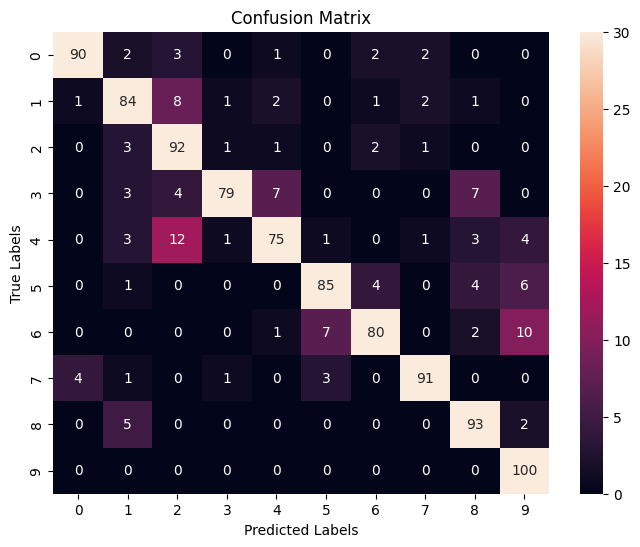

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix with color scale limited to 30
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".5g", vmax=30)  # Limits the color scale to 30

# Labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

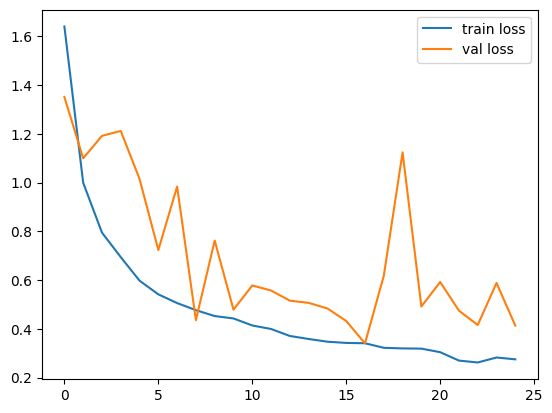

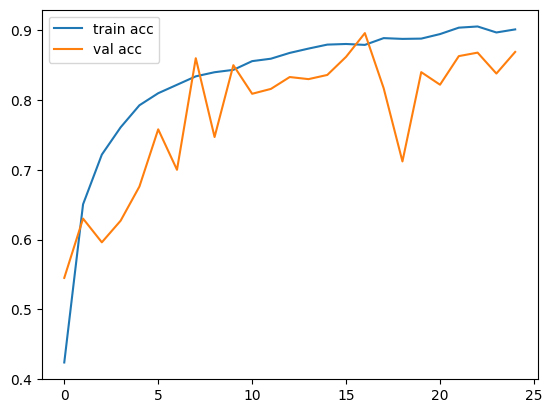

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')